In [192]:
# Requirements for the project

import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import mlflow


In [193]:
file_path = "Datasets/hour.csv"
df = pd.read_csv(file_path)

df.info()
df.head()
print('\n\ndescribe\n\n')
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


describe




,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


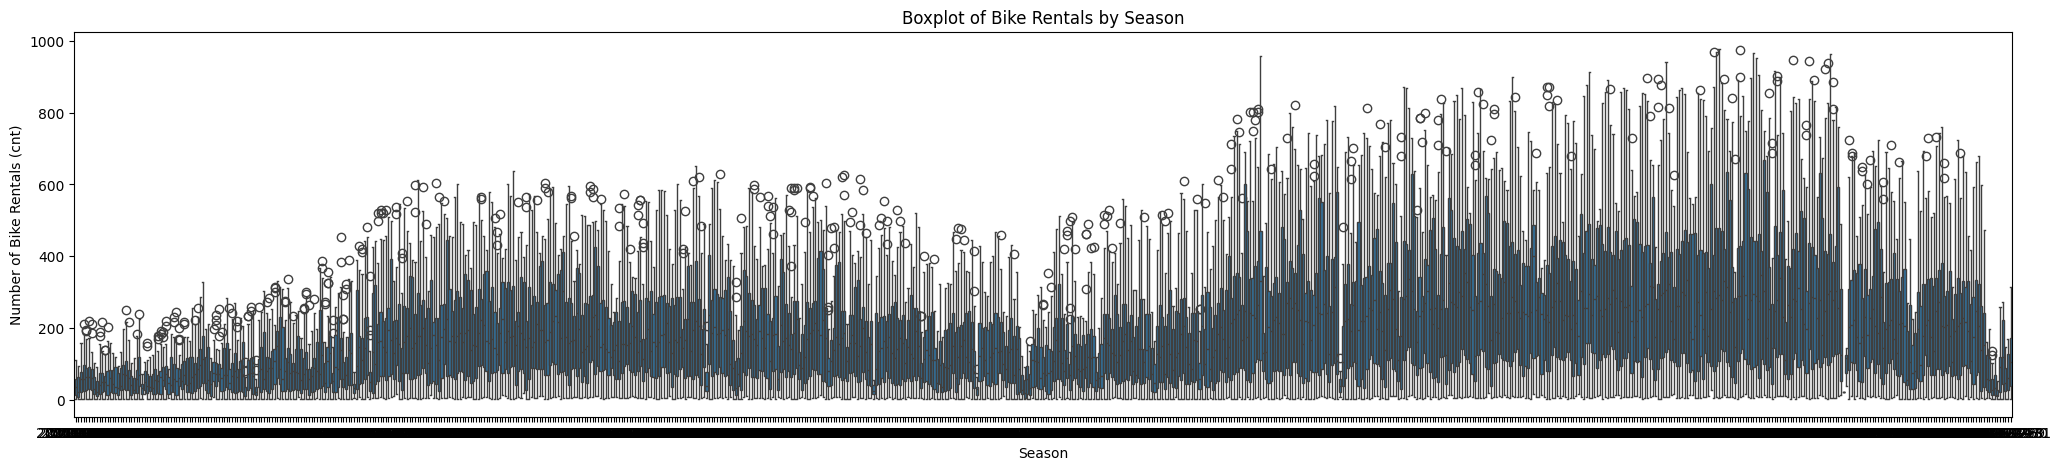

In [194]:
# Boxplot Rentals by Season

plt.figure(figsize=(25, 5))
sns.boxplot(x='dteday', y='cnt', data=df)
plt.title('Boxplot of Bike Rentals by Season')
plt.xlabel('Season')
plt.ylabel('Number of Bike Rentals (cnt)')
plt.show()  

# most bike rentals happen in season 3 (summer)
# least bikes were rented in season 1 (spring)

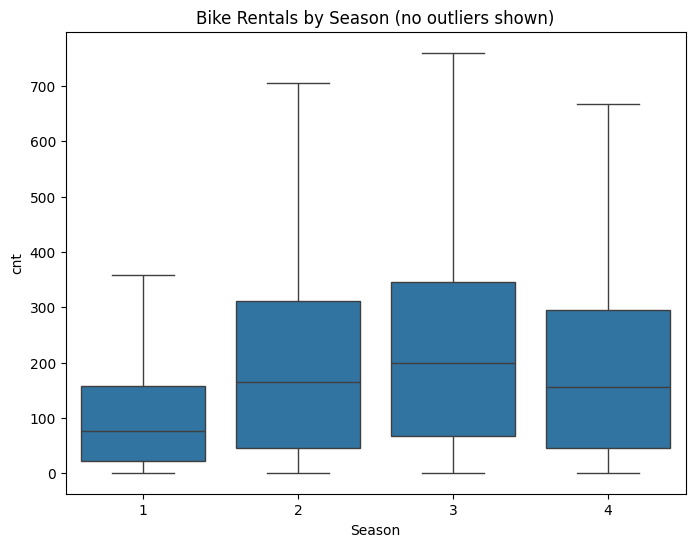

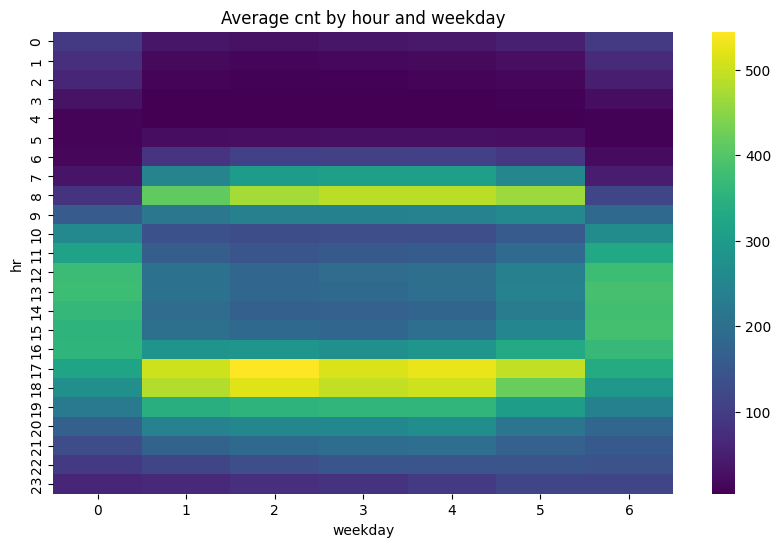

In [195]:
# ...existing code...
# Verbesserte Visualisierungen für cnt (mehr Übersichtlichkeit)

# 1) Gruppiert nach season (weniger Boxen)
plt.figure(figsize=(8,6))
sns.boxplot(x='season', y='cnt', data=df, showfliers=False)   # keine einzelnen Ausreißer anzeigen
plt.title('Bike Rentals by Season (no outliers shown)')
plt.xlabel('Season')
plt.ylabel('cnt')
plt.show()

# 4) Heatmap Hour x Weekday (sehr hilfreich bei stündlichen Daten)
pivot = df.pivot_table(values='cnt', index='hr', columns='weekday', aggfunc='mean')
plt.figure(figsize=(10,6))
sns.heatmap(pivot, cmap='viridis')
plt.title('Average cnt by hour and weekday')
plt.show()

# ...existing code...

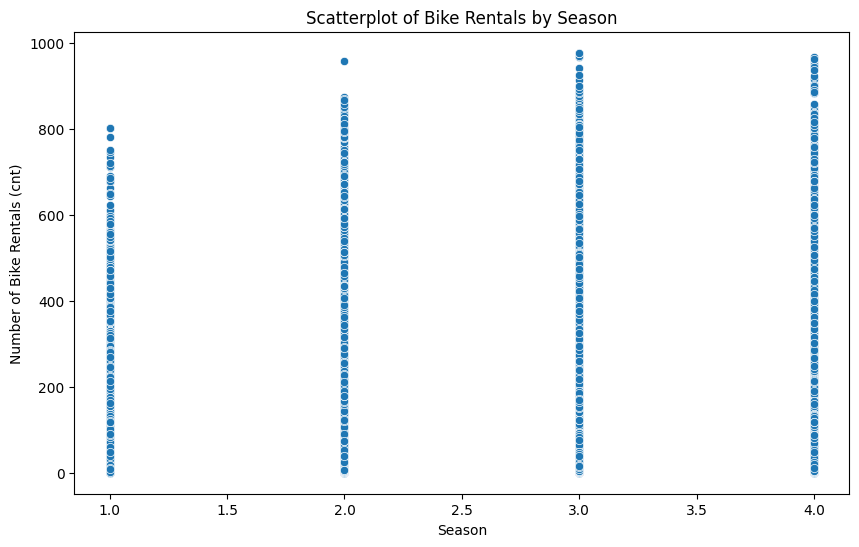

In [196]:
# Scatterplot Rentals by season

plt.figure(figsize=(10, 6))
sns.scatterplot(x='season', y='cnt', data=df)
plt.title('Scatterplot of Bike Rentals by Season')
plt.xlabel('Season')
plt.ylabel('Number of Bike Rentals (cnt)')
plt.show()

# man sieht basically gar nichts

<Axes: xlabel='temp', ylabel='cnt'>

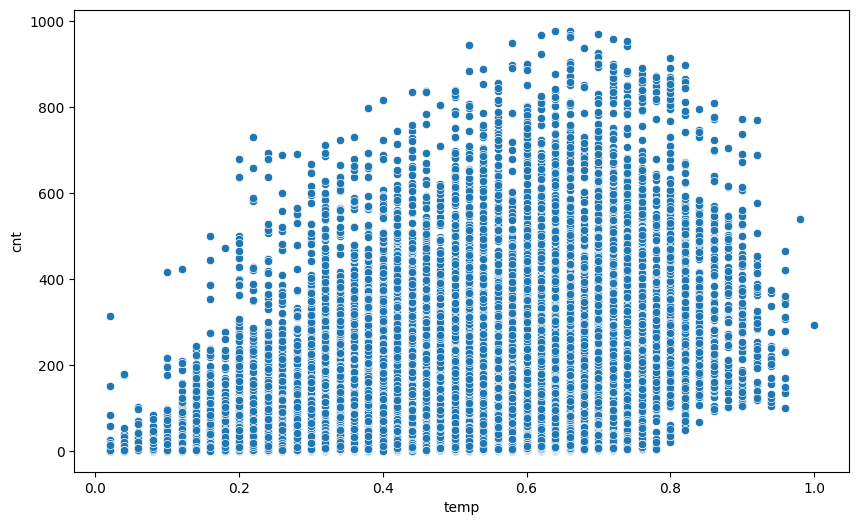

In [197]:
# "Correlation Heatmap"

plt.figure(figsize=(10, 6))
sns.scatterplot(x='temp', y='cnt', data=df)


<Axes: xlabel='temp', ylabel='cnt'>

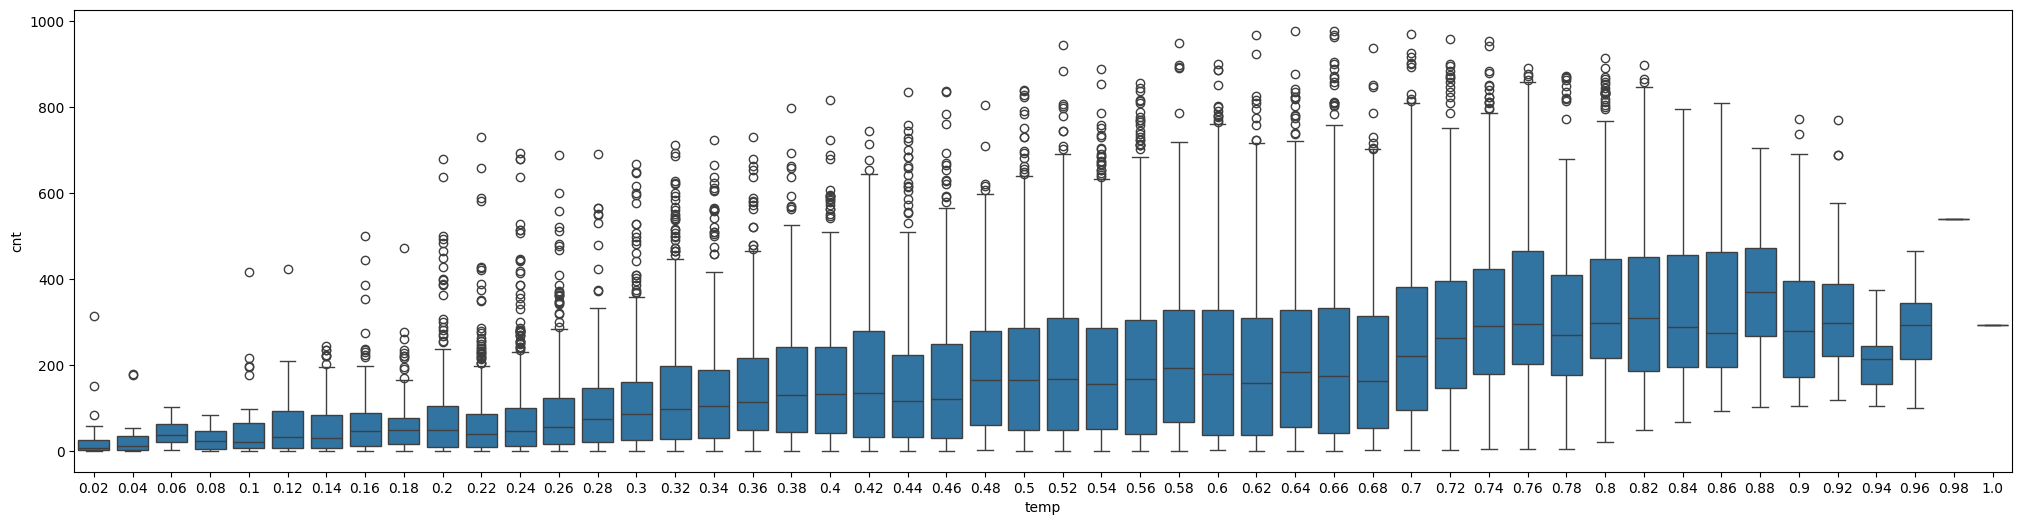

In [198]:
# Boxplot Correlation Heatmap

plt.figure(figsize=(25, 6))
sns.boxplot(x='temp', y='cnt', data=df)

<Axes: xlabel='temp', ylabel='cnt'>

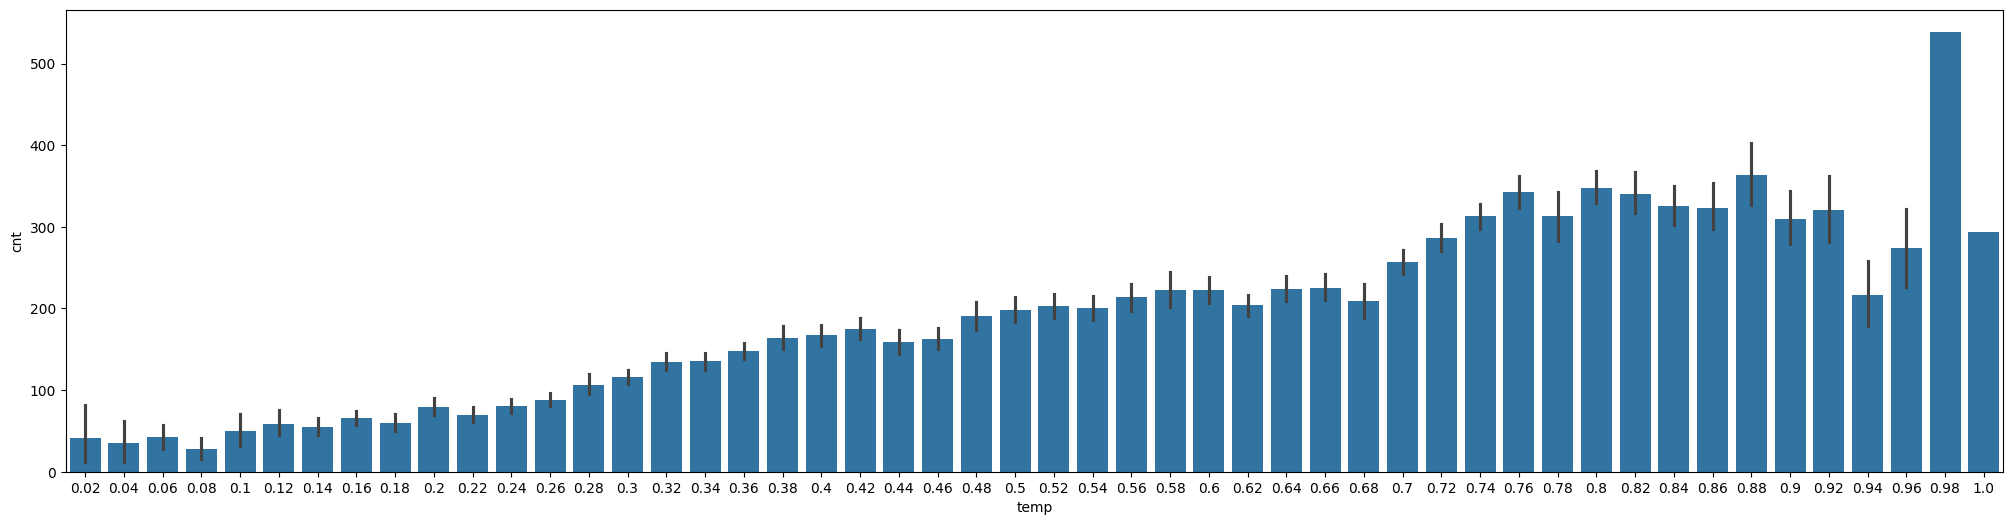

In [199]:
# Boxplot Correlation Heatmap

plt.figure(figsize=(25, 6))
sns.barplot(x='temp', y='cnt', data=df)

<Axes: xlabel='windspeed', ylabel='cnt'>

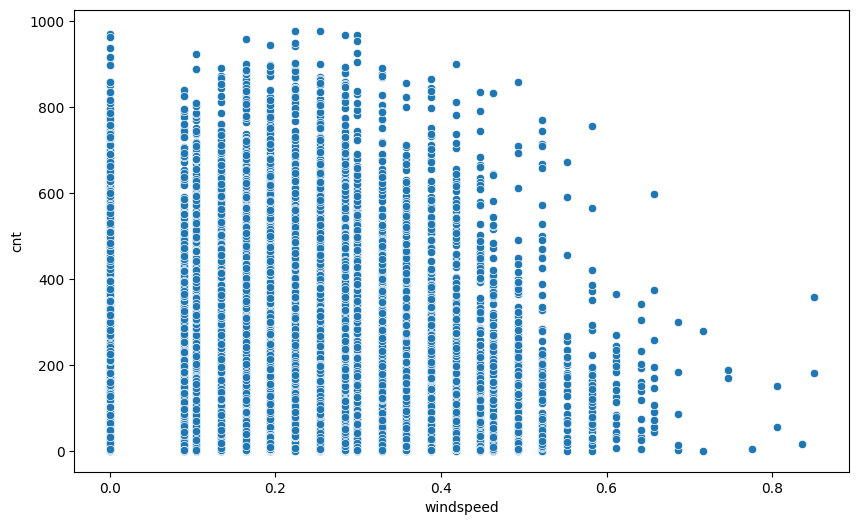

In [200]:
# Scatterplot for Windspeed vs Count

plt.figure(figsize=(10, 6))
sns.scatterplot(x='windspeed', y='cnt', data=df)

<Axes: xlabel='windspeed', ylabel='cnt'>

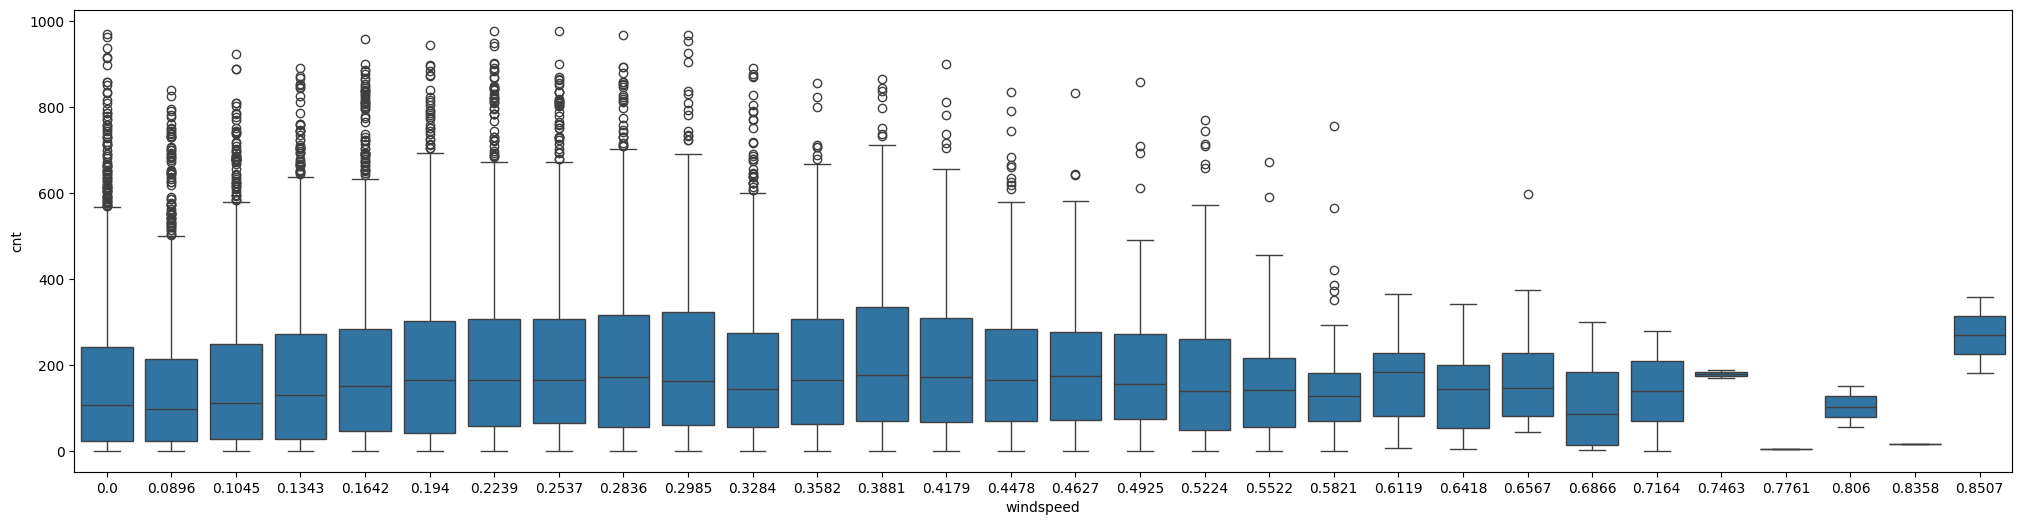

In [201]:
# Boxplot Windspeet vs Count

plt.figure(figsize=(25, 6))
sns.boxplot(x='windspeed', y='cnt', data=df)


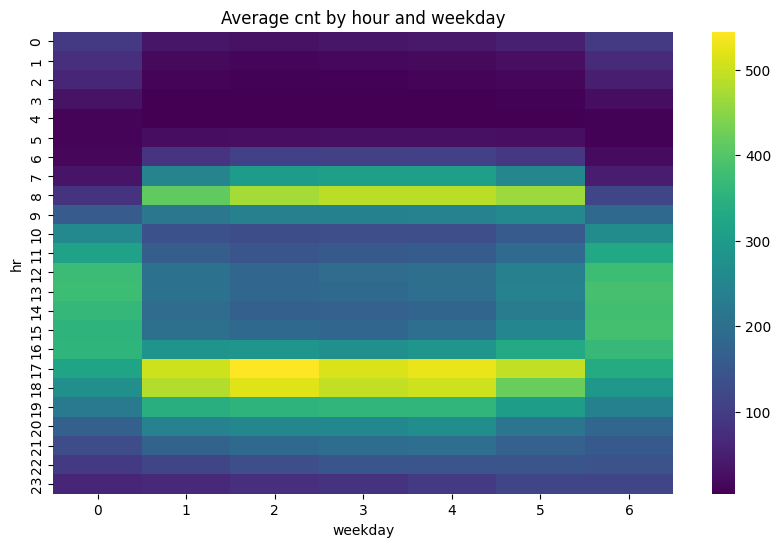

In [202]:
pivot = df.pivot_table(values='cnt', index='hr', columns='weekday', aggfunc='mean')
plt.figure(figsize=(10,6))
sns.heatmap(pivot, cmap='viridis')
plt.title('Average cnt by hour and weekday')
plt.show()

Pearson correlation matrix:


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,0.404046,0.866014,0.489164,-0.004775,0.014723,0.001357,-0.003416,-0.014198,0.136178,0.137615,0.009577,-0.074505,0.158295,0.282046,0.278379
season,0.404046,1.000000,-0.010742,0.830386,-0.006117,-0.009585,-0.002335,0.013743,-0.014524,0.312025,0.319380,0.150625,-0.149773,0.120206,0.174226,0.178056
yr,0.866014,-0.010742,1.000000,-0.010473,-0.003867,0.006692,-0.004485,-0.002196,-0.019157,0.040913,0.039222,-0.083546,-0.008740,0.142779,0.253684,0.250495
mnth,0.489164,0.830386,-0.010473,1.000000,-0.005772,0.018430,0.010400,-0.003477,0.005400,0.201691,0.208096,0.164411,-0.135386,0.068457,0.122273,0.120638
hr,-0.004775,-0.006117,-0.003867,-0.005772,1.000000,0.000479,-0.003498,0.002285,-0.020203,0.137603,0.133750,-0.276498,0.137252,0.301202,0.374141,0.394071
holiday,0.014723,-0.009585,0.006692,0.018430,0.000479,1.000000,-0.102088,-0.252471,-0.017036,-0.027340,-0.030973,-0.010588,0.003988,0.031564,-0.047345,-0.030927
weekday,0.001357,-0.002335,-0.004485,0.010400,-0.003498,-0.102088,1.000000,0.035955,0.003311,-0.001795,-0.008821,-0.037158,0.011502,0.032721,0.021578,0.026900
workingday,-0.003416,0.013743,-0.002196,-0.003477,0.002285,-0.252471,0.035955,1.000000,0.044672,0.055390,0.054667,0.015688,-0.011830,-0.300942,0.134326,0.030284
weathersit,-0.014198,-0.014524,-0.019157,0.005400,-0.020203,-0.017036,0.003311,0.044672,1.000000,-0.102640,-0.105563,0.418130,0.026226,-0.152628,-0.120966,-0.142426
temp,0.136178,0.312025,0.040913,0.201691,0.137603,-0.027340,-0.001795,0.055390,-0.102640,1.000000,0.987672,-0.069881,-0.023125,0.459616,0.335361,0.404772



Spearman correlation matrix:


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,0.404304,0.866014,0.489211,-0.004768,0.014723,0.001344,-0.003416,-0.007462,0.127947,0.126447,0.007488,-0.073236,0.159440,0.256093,0.243742
season,0.404304,1.000000,-0.010713,0.830847,-0.006092,-0.009487,-0.002320,0.013671,-0.013335,0.305753,0.305816,0.147515,-0.136890,0.183701,0.182399,0.185179
yr,0.866014,-0.010713,1.000000,-0.010429,-0.003861,0.006692,-0.004493,-0.002196,-0.013168,0.036441,0.035346,-0.083119,-0.010653,0.114742,0.221027,0.207500
mnth,0.489211,0.830847,-0.010429,1.000000,-0.005737,0.018695,0.010293,-0.003653,0.008614,0.191369,0.190804,0.159684,-0.129945,0.118084,0.127066,0.125889
hr,-0.004768,-0.006092,-0.003861,-0.005737,1.000000,0.000477,-0.003497,0.002281,-0.030349,0.133998,0.132986,-0.278530,0.140367,0.476666,0.510569,0.510878
holiday,0.014723,-0.009487,0.006692,0.018695,0.000477,1.000000,-0.101857,-0.252471,-0.012917,-0.028125,-0.031468,-0.012288,0.004141,0.015943,-0.043526,-0.029526
weekday,0.001344,-0.002320,-0.004493,0.010293,-0.003497,-0.101857,1.000000,0.035044,0.003277,-0.005724,-0.012979,-0.036598,0.009936,0.012672,0.034711,0.030297
workingday,-0.003416,0.013671,-0.002196,-0.003653,0.002281,-0.252471,0.035044,1.000000,0.043875,0.054965,0.054103,0.017325,-0.010723,-0.176671,0.083105,0.021033
weathersit,-0.007462,-0.013335,-0.013168,0.008614,-0.030349,-0.012917,0.003277,0.043875,1.000000,-0.104510,-0.111145,0.409364,0.008303,-0.160280,-0.112062,-0.126276
temp,0.127947,0.305753,0.036441,0.191369,0.133998,-0.028125,-0.005724,0.054965,-0.104510,1.000000,0.989633,-0.055408,-0.009719,0.570989,0.373196,0.423330



Pearson p-values matrix:


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.290745e-01,5.226367e-02,8.580507e-01,6.525373e-01,6.125896e-02,1.034052e-72,3.143999e-74,2.067909e-01,7.968208e-23,6.696250e-98,3.530445e-315,9.312181e-307
season,0.000000e+00,0.000000e+00,1.567419e-01,0.000000e+00,4.200485e-01,2.064236e-01,7.581994e-01,7.003247e-02,5.554418e-02,0.000000e+00,0.000000e+00,1.017253e-88,9.952086e-88,6.011151e-57,1.685363e-118,9.182191e-124
yr,0.000000e+00,1.567419e-01,0.000000e+00,1.674085e-01,6.102264e-01,3.777236e-01,5.543892e-01,7.722159e-01,1.155380e-02,6.834869e-08,2.313800e-07,2.667231e-28,2.492936e-01,8.099088e-80,2.361305e-253,7.213184e-247
mnth,0.000000e+00,0.000000e+00,1.674085e-01,0.000000e+00,4.467412e-01,1.511170e-02,1.703835e-01,6.467161e-01,4.766073e-01,5.870299e-159,2.616186e-169,1.454903e-105,6.975014e-72,1.645466e-19,7.122155e-59,2.397022e-57
hr,5.290745e-01,4.200485e-01,6.102264e-01,4.467412e-01,0.000000e+00,9.496393e-01,6.447460e-01,7.632553e-01,7.736273e-03,3.230609e-74,3.477333e-70,1.731663e-302,7.627971e-74,0.000000e+00,0.000000e+00,0.000000e+00
holiday,5.226367e-02,2.064236e-01,3.777236e-01,1.511170e-02,9.496393e-01,0.000000e+00,1.731998e-41,7.085456e-251,2.471281e-02,3.125207e-04,4.430432e-05,1.627717e-01,5.991304e-01,3.158140e-05,4.249584e-10,4.546169e-05
weekday,8.580507e-01,7.581994e-01,5.543892e-01,1.703835e-01,6.447460e-01,1.731998e-41,0.000000e+00,2.125309e-06,6.625300e-01,8.129614e-01,2.449110e-01,9.588875e-07,1.294730e-01,1.599713e-05,4.444944e-03,3.902662e-04
workingday,6.525373e-01,7.003247e-02,7.722159e-01,6.467161e-01,7.632553e-01,7.085456e-251,2.125309e-06,0.000000e+00,3.824011e-09,2.728501e-13,5.528805e-13,3.863491e-02,1.188883e-01,0.000000e+00,8.836082e-71,6.524265e-05
weathersit,6.125896e-02,5.554418e-02,1.155380e-02,4.766073e-01,7.736273e-03,2.471281e-02,6.625300e-01,3.824011e-09,0.000000e+00,6.385196e-42,2.960856e-44,0.000000e+00,5.448907e-04,4.525012e-91,1.189250e-57,1.979754e-79
temp,1.034052e-72,0.000000e+00,6.834869e-08,5.870299e-159,3.230609e-74,3.125207e-04,8.129614e-01,2.728501e-13,6.385196e-42,0.000000e+00,0.000000e+00,2.888000e-20,2.297737e-03,0.000000e+00,0.000000e+00,0.000000e+00


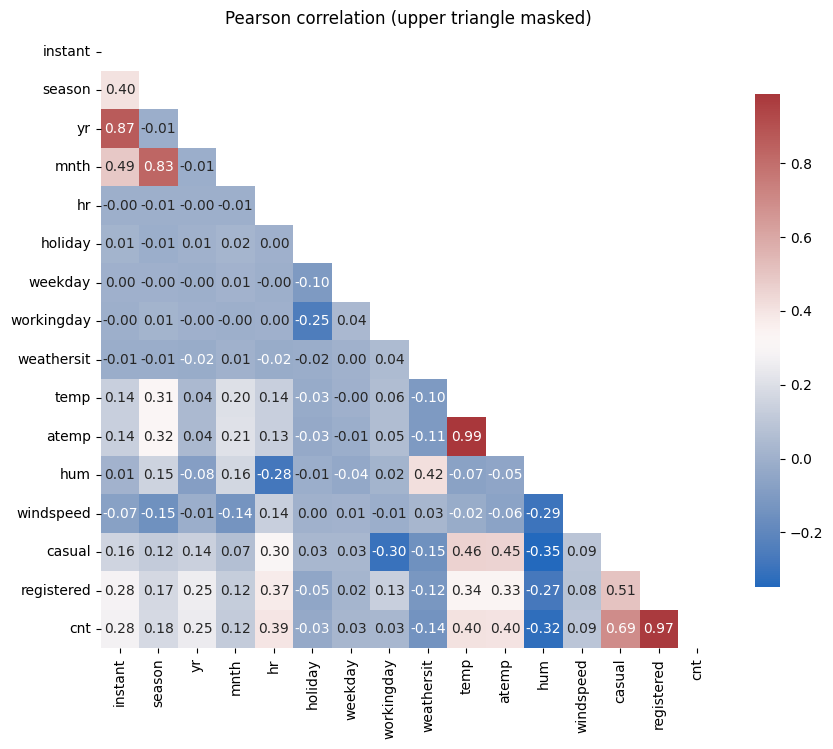

In [203]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from itertools import combinations

# numerische Spalten
num = df.select_dtypes(include=[np.number]).copy()
cols = num.columns.tolist()

# Pearson- und Spearman-Matrizen
pearson_mat = num.corr(method='pearson')
spearman_mat = num.corr(method='spearman')

# p-Werte für Pearson (symmetrische Matrix, nur obere Dreieck berechnen)
pvals = pd.DataFrame(np.nan, index=cols, columns=cols)
for a, b in combinations(cols, 2):
    xa = num[a].dropna()
    xb = num[b].dropna().loc[xa.index]  # gleiche Indizes verwenden
    if len(xa) > 2:
        _, p = stats.pearsonr(xa, xb)
    else:
        p = np.nan
    pvals.at[a, b] = p
    pvals.at[b, a] = p
np.fill_diagonal(pvals.values, 0.0)

# Ausgabe im Notebook
print("Pearson correlation matrix:")
display(pearson_mat)
print("\nSpearman correlation matrix:")
display(spearman_mat)
print("\nPearson p-values matrix:")
display(pvals)

# Heatmap (Pearson) — obere Dreiecksmatrix maskiert
plt.figure(figsize=(10, 8))
mask = np.triu(np.ones_like(pearson_mat, dtype=bool))
sns.heatmap(pearson_mat, mask=mask, cmap='vlag', annot=True, fmt=".2f", square=True, cbar_kws={'shrink': .8})
plt.title('Pearson correlation (upper triangle masked)')
plt.show()

# Speichern
os.makedirs("artifacts", exist_ok=True)
pearson_mat.to_csv("artifacts/pearson_correlation_matrix.csv")
spearman_mat.to_csv("artifacts/spearman_correlation_matrix.csv")
pvals.to_csv("artifacts/pearson_pvalues_matrix.csv")

In [213]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
drop_cols = ['atemp', 'casual', 'registered', 'yr', 'instant', 'dteday']

In [214]:
print("All finite X_train?:", np.isfinite(df.all()))  

X = df.copy()
for c in drop_cols:
    if c in X.columns:
        X = X.drop(columns=[c])
        # print(f"Dropped column: {c}")
# X = df.drop(columns=[c for c in drop_cols if c in df.columns], errors='ignore') # deleting features in drop_cols if they exist
# print(X.columns)
if 'cnt' in X.columns: #falls cnt versehentlich in X ist, remove it
    X = X.drop(columns=['cnt'])
y = df['cnt'] # Zielvariable
#only numerical values for simple linear regression model
X = X.select_dtypes(include=[np.number])
print("\n\nFeatures shape:", X.shape, "Target shape:", y.shape)
print("All finite X_train?:", np.isfinite(X.values).all())  


All finite X_train?: instant       True
dteday        True
season        True
yr            True
mnth          True
hr            True
holiday       True
weekday       True
workingday    True
weathersit    True
temp          True
atemp         True
hum           True
windspeed     True
casual        True
registered    True
cnt           True
dtype: bool


Features shape: (17379, 10) Target shape: (17379,)
All finite X_train?: True


In [230]:
# train-test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# random_state sorgt für Reproduzierbarkeit der Aufteilung
print("\n\nTrain shape:", X_train.shape, "Test shape:", X_test.shape)

X_test.describe()



Train shape: (13903, 10) Test shape: (3476, 10)


,season,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed
count,3476.000000,3476.000000,3476.000000,3476.000000,3476.000000,3476.000000,3476.000000,3476.000000,3476.000000,3476.000000
mean,2.471231,6.476985,11.505178,0.029056,3.025604,0.695339,1.422325,0.495351,0.628098,0.191199
std,1.106959,3.445993,6.925148,0.167989,1.983437,0.460330,0.641497,0.190722,0.193469,0.122542
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000
25%,1.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.480000,0.104500
50%,2.000000,6.000000,11.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.630000,0.194000
75%,3.000000,9.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.640000,0.780000,0.253700
max,4.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,0.960000,1.000000,0.850700


In [ ]:
#Preprocessing +  Linear Regresssion Pipeline erstellen und fitten
print("All finite X_train?:", np.isfinite(X_train.values).all())  



print("NaNs in X_train:", X_train.isna().any().any())  

# categorical features: one-hot encoding
const_cols = X_train.columns[X_train.nunique(dropna=True) <= 1].tolist()
if const_cols:
    print(f"Remove const columns:", const_cols)
    X_train = X_train.drop(columns=const_cols)
    X_test = X_test.drop(columns=const_cols)

# define numerical columns
# num_cols = X_train.select_dtypes(include=[np.number]).columns.tolist()
]
# numerical features: imputation + standard scaling
num_pipeline = Pipeline(
    [
        ('imputer', SimpleImputer(strategy='mean')),
        ('scalar', StandardScaler())
    ]
)

# preprocessing + column transformer
preproc = ColumnTransformer(
    transformers=[
        ('num', num_pipeline, num_cols)
    ],
    remainder='drop'
)

# acutual pipeline, combining preprocessing and linear Regression model
final_pipeline = Pipeline(
    [
        ('preproc', preproc),
        ('lr', LinearRegression())
    ]
)

# Pipeline fitten
final_pipeline.fit(X_train, y_train)
print("\n\n----- Pipeline fitted -----\n\n")

# random bs
print("NaNs in X_train:", X_train.isna().any().any())  
print("All finite X_train?:", np.isfinite(X_train.values).all())  
X_test.describe()
y_pred = final_pipeline.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"R2 on test: {r2:.3f}")
print(f"RMSE on test: {rmse:.3f}")

All finite X_train?: True
NaNs in X_train: False


----- Pipeline fitted -----


NaNs in X_train: False
All finite X_train?: True
R2 on test: 0.256
RMSE on test: 153.473


/Users/bauercedric91/Documents/MLOps_November_track/Project_1/.venv/lib/python3.9/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/bauercedric91/Documents/MLOps_November_track/Project_1/.venv/lib/python3.9/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Users/bauercedric91/Documents/MLOps_November_track/Project_1/.venv/lib/python3.9/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_


In [ ]:
# Predictions and evaluation

